In [2]:
pip install factor-analyzer pandas numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=d62cfd64a88a33489706c8093750efd08b38bdf186bd7646e25f50dc75defe20
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor-analyzer


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

# 데이터 로드
file_path = '/content/drive/MyDrive/고려대 미래 교육/게임자동전투_data.xlsx'
data = pd.read_excel(file_path)

print(data)
data = pd.DataFrame(data)
print(data.columns)
data[['typ1_a','typ2_a']]

      ID  exp  A_rate  typ1_a  typ2_a  typ3_a  typ4_b  typ5_b  typ6_b  typ7_c  \
0      1    1       5       3       4       4       1       1       3       1   
1      2    1       2       2       2       2       2       2       1       1   
2      3    2       1       4       3       4       2       1       2       3   
3      4    1       6       5       3       3       4       4       4       4   
4      5    2       1       4       4       4       4       3       2       2   
..   ...  ...     ...     ...     ...     ...     ...     ...     ...     ...   
133  135    1       6       4       4       1       1       1       1       1   
134  136    1       5       4       4       2       3       3       4       4   
135  137    1       1       3       3       3       3       3       3       3   
136  138    2       1       4       3       2       2       2       1       1   
137  139    1       6       3       3       1       2       1       3       2   

     ...  fun15_d  fun16_d 

,typ1_a,typ2_a
0,3,4
1,2,2
2,4,3
3,5,3
4,4,4
...,...,...
133,4,4
134,4,4
135,3,3
136,4,3


In [23]:
# 분석에 사용할 변수 선택 (예: typ1_a부터 fun19_d까지의 변수)
variables = ['typ1_a', 'typ2_a', 'typ3_a', 'typ4_b', 'typ5_b',
       'typ6_b', 'typ7_c', 'typ8_c', 'typ9_c', 'typ10_c', 'fun1_a', 'fun2_a',
       'fun3_a', 'fun4_a', 'fun5_a', 'fun6_b', 'fun7_b', 'fun8_b', 'fun9_b',
       'fun10_c', 'fun11_c', 'fun12_c', 'fun13_c', 'fun14_c', 'fun15_d',
       'fun16_d', 'fun17_d', 'fun18_d', 'fun19_d']
data_selected = data[variables]

# 데이터 스케일링
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# 요인분석 수행
fa = FactorAnalyzer(n_factors=5, rotation='varimax', method='principal')
fa.fit(data_scaled)

# 요인 적재량 출력
loadings = fa.loadings_
print("Factor Loadings:")
print(loadings)

# 회전된 성분행렬 출력
rotated_loadings = fa.get_communalities()
print("\nRotated Component Matrix:")
print(rotated_loadings)

# 각 변수의 공통성 출력
communalities = fa.get_communalities()
print("\nCommunalities:")
print(communalities)

# 고유값 출력
eigenvalues, _ = fa.get_eigenvalues()
print("\nEigenvalues:")
print(eigenvalues)

Factor Loadings:
[[ 1.73323486e-01 -1.51587384e-02 -1.74700591e-02  2.18555553e-01
   7.76918230e-01]
 [ 2.22499658e-01  1.71125984e-01  1.34530879e-01  8.34345468e-02
   7.43754459e-01]
 [-2.66496549e-02  3.01170929e-01  2.03642373e-01 -6.19019556e-02
   6.74733417e-01]
 [ 1.00930883e-01  7.57890970e-01  9.59428731e-02  4.88449446e-02
   2.59376788e-01]
 [-8.58873039e-02  8.24920429e-01  1.08007630e-01  8.32983591e-03
   2.62820768e-02]
 [ 1.82540449e-01  5.54960912e-01 -1.04033331e-01  3.90887731e-01
   3.21990655e-01]
 [-1.15635969e-01  5.57066762e-01  2.81509138e-01  3.27212032e-01
   3.61363700e-02]
 [ 1.19146390e-01  4.49995905e-01  8.27280223e-02  5.18009912e-01
   1.97451099e-01]
 [ 1.84273277e-01  1.31082848e-01  2.07332610e-01  6.02907862e-01
   2.65339803e-01]
 [-4.10681958e-02  3.15699535e-01  5.46522293e-01  2.94548920e-01
  -3.89461998e-02]
 [ 1.55625702e-01 -1.43375408e-01  1.98317586e-01  6.60984252e-01
  -2.70930088e-02]
 [ 8.09442469e-02  1.80777794e-01  4.00838391e-0

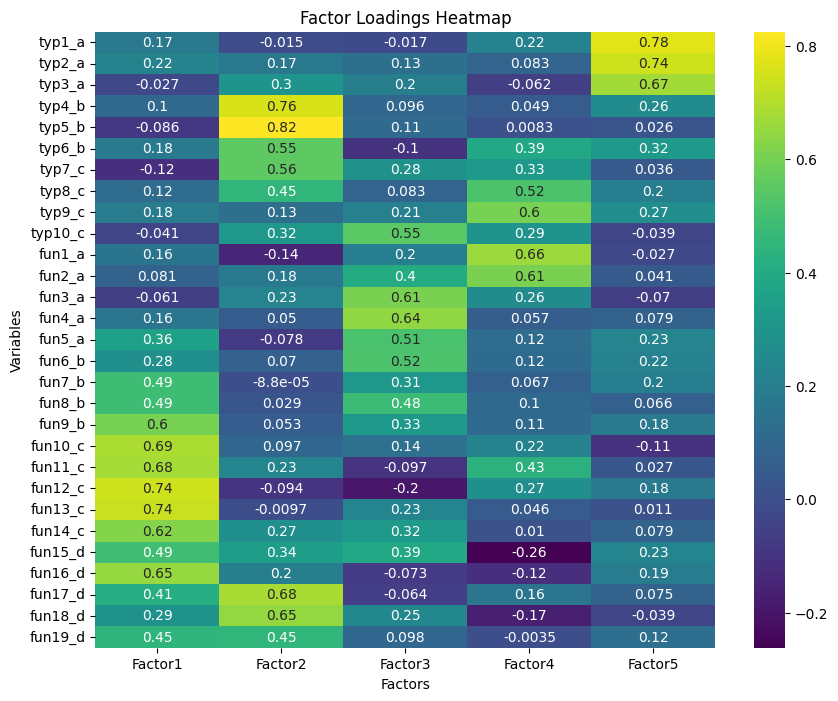

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 요인 적재량을 데이터프레임으로 변환
loadings_df = pd.DataFrame(loadings, index=variables, columns=[f'Factor{i+1}' for i in range(loadings.shape[1])])

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, annot=True, cmap='viridis')
plt.title('Factor Loadings Heatmap')
plt.xlabel('Factors')
plt.ylabel('Variables')
plt.show()


<ipython-input-25-56033e578554>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loadings_df.loc[variables, factor], y=variables, palette='viridis')


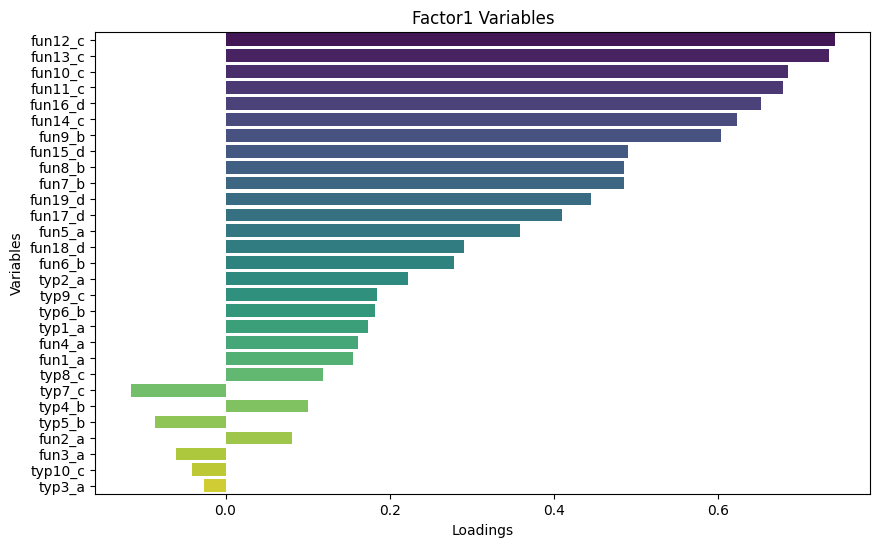

<ipython-input-25-56033e578554>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loadings_df.loc[variables, factor], y=variables, palette='viridis')


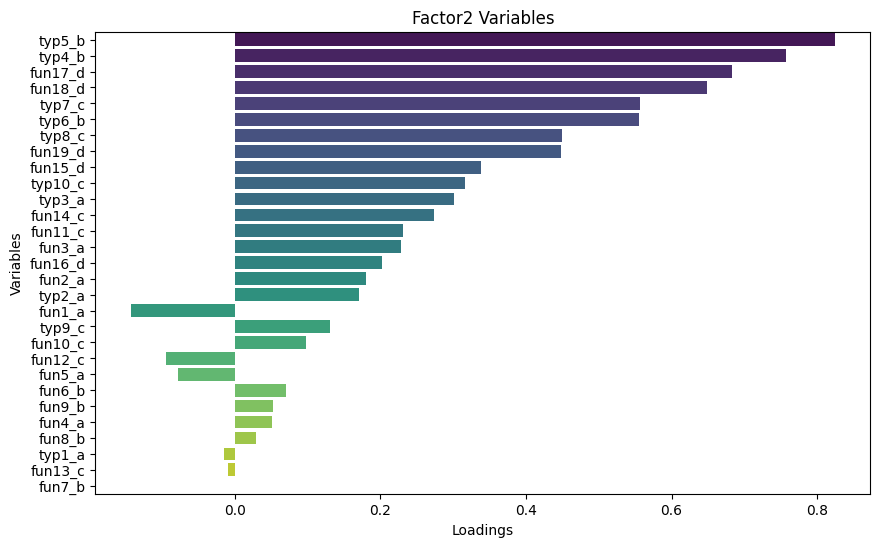

<ipython-input-25-56033e578554>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loadings_df.loc[variables, factor], y=variables, palette='viridis')


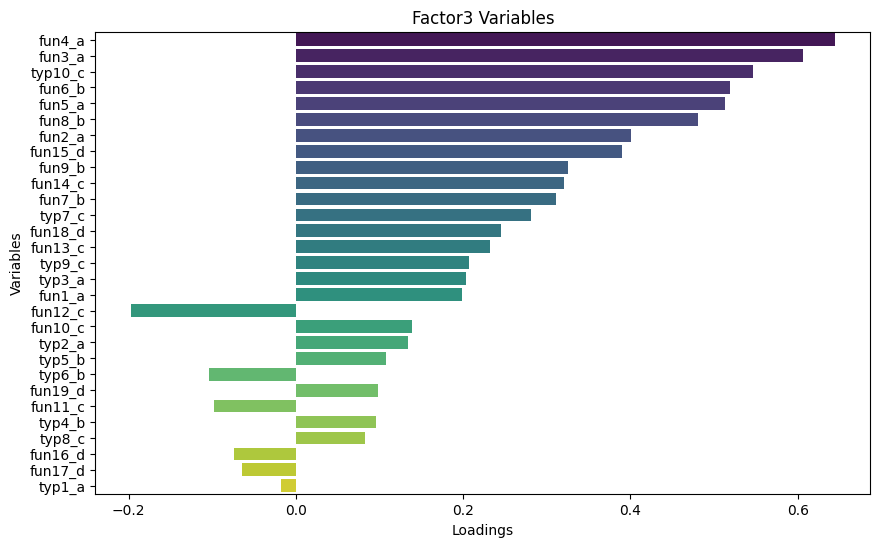

<ipython-input-25-56033e578554>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loadings_df.loc[variables, factor], y=variables, palette='viridis')


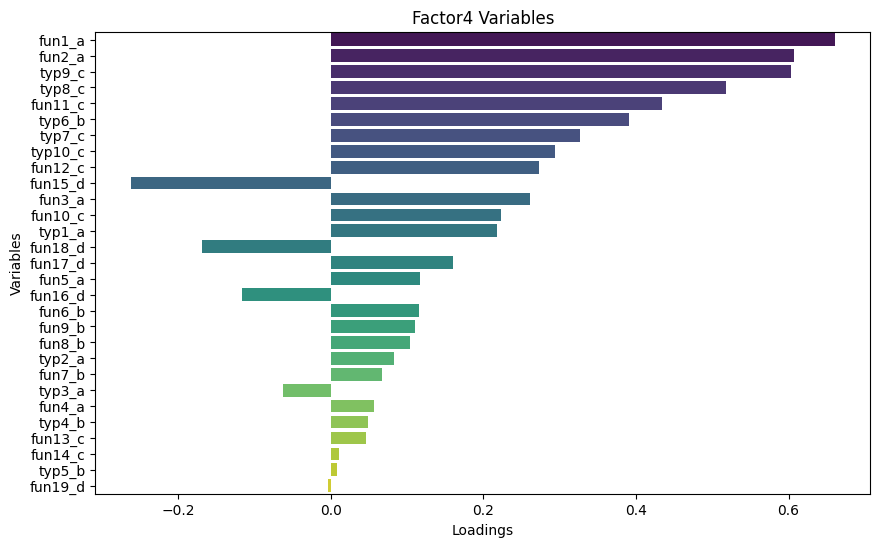

<ipython-input-25-56033e578554>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loadings_df.loc[variables, factor], y=variables, palette='viridis')


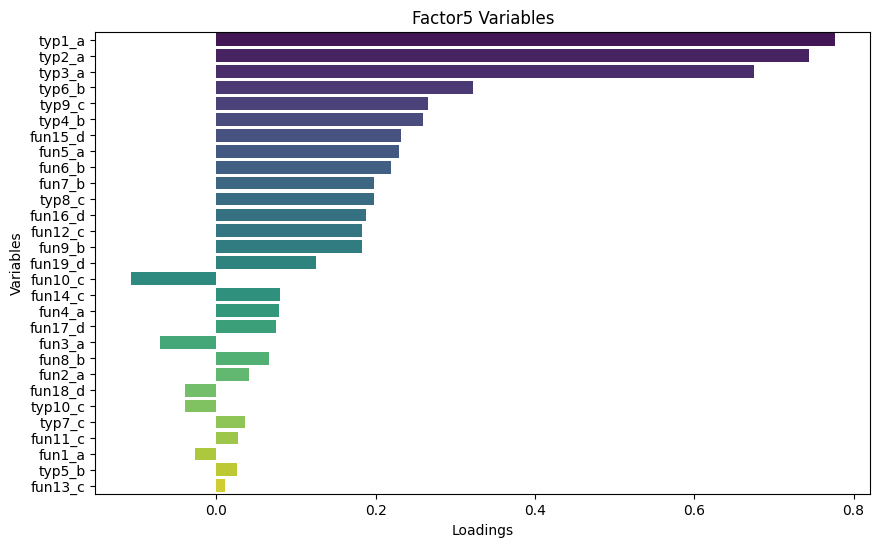

In [25]:
# 요인별로 변수들을 그룹핑
factor_groups = {}
for i in range(loadings.shape[1]):
    factor_groups[f'Factor{i+1}'] = loadings_df.iloc[:, i].abs().sort_values(ascending=False).index.tolist()

# 요인별 변수 그룹핑 시각화
for factor, variables in factor_groups.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=loadings_df.loc[variables, factor], y=variables, palette='viridis')
    plt.title(f'{factor} Variables')
    plt.xlabel('Loadings')
    plt.ylabel('Variables')
    plt.show()


In [31]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# 요인분석 수행
fa = FactorAnalyzer(n_factors=5, rotation='varimax', method='principal')
fa.fit(data_scaled)

# 요인 적재량 출력
loadings = fa.loadings_
loadings_df = pd.DataFrame(loadings, index=variables, columns=[f'Factor{i+1}' for i in range(loadings.shape[1])])



In [33]:
# 요인별로 변수들을 그룹핑
factor_groups = {}
for i in range(loadings.shape[1]):
    factor_groups[f'Factor{i+1}'] = loadings_df.iloc[:, i].abs().sort_values(ascending=False).index.tolist()

# 요인별 변수 그룹핑 테이블 생성 및 CSV로 저장
factor_tables = {}
for factor, variables in factor_groups.items():
    factor_tables[factor] = loadings_df.loc[variables, factor]
    # CSV 파일로 저장
    factor_tables[factor].to_csv(f'{factor}_loadings.csv')

factor_tables


{'Factor1': fun2_a     0.742853
 fun18_d    0.735529
 fun3_a     0.685165
 fun8_b     0.678680
 fun11_c    0.652207
 typ10_c    0.623683
 fun17_d    0.603653
 typ7_c     0.490639
 fun4_a     0.486036
 fun14_c    0.485898
 fun13_c    0.445772
 fun1_a     0.409663
 fun19_d    0.359342
 typ5_b     0.291092
 fun10_c    0.278228
 typ2_a     0.222500
 fun6_b     0.184273
 typ4_b     0.182540
 typ1_a     0.173323
 fun9_b     0.160847
 typ8_c     0.155626
 fun5_a     0.119146
 fun15_d   -0.115636
 typ6_b     0.100931
 typ9_c    -0.085887
 fun16_d    0.080944
 fun12_c   -0.060553
 fun7_b    -0.041068
 typ3_a    -0.026650
 Name: Factor1, dtype: float64,
 'Factor2': typ9_c     0.824920
 typ6_b     0.757891
 fun1_a     0.682982
 typ5_b     0.649071
 fun15_d    0.557067
 typ4_b     0.554961
 fun5_a     0.449996
 fun13_c    0.448032
 typ7_c     0.338805
 fun7_b     0.315700
 typ3_a     0.301171
 typ10_c    0.274235
 fun8_b     0.230711
 fun12_c    0.228655
 fun11_c    0.202247
 fun16_d    0.180778
 